# Proyek Analisis Data: Analisis Air Quality
- **Nama:** Bayu Nugraha
- **Email:** bayunugraha.bjm@gmail.com
- **ID Dicoding:** MC216D5Y0488

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kecepatan angin terhadap PM2.5 di musim panas?
- Bagaimana hubungan antara NO2, CO, dan PM2.5?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path ke dataset di Google Drive
DATASET_PATH = "/content/drive/My Drive/Air-quality-dataset/clean_df_all.csv"

## Data Wrangling

### Gathering Data

In [ ]:
# Load dataset
df = pd.read_csv(DATASET_PATH)

In [ ]:
# Tampilkan 5 data teratas
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date_time,date_time_month,RAIN_GROUP
0,269,2013,3,12,4,112.0,140.0,68.0,81.0,1399,...,4.3,1006.3,1.5,0.4,E,0.9,Aotizhongxin,3/12/2013 4:00,2013-03,No Rain
1,270,2013,3,12,5,140.0,237.0,34.0,74.0,2100,...,4.7,1006.1,1.5,0.1,NNE,1.3,Aotizhongxin,3/12/2013 5:00,2013-03,No Rain
2,271,2013,3,12,6,146.0,165.0,22.0,66.0,2100,...,4.1,1006.2,2.6,0.9,W,1.0,Aotizhongxin,3/12/2013 6:00,2013-03,No Rain
3,272,2013,3,12,7,115.0,121.0,21.0,77.0,2100,...,3.5,1006.9,2.2,0.9,NW,1.4,Aotizhongxin,3/12/2013 7:00,2013-03,No Rain
4,273,2013,3,12,8,120.0,122.0,17.0,78.0,1600,...,3.1,1006.9,1.9,0.4,N,1.5,Aotizhongxin,3/12/2013 8:00,2013-03,No Rain


**Insight:**
- Dataset berisi berbagai parameter kualitas udara dari beberapa lokasi.
- Kolom yang tersedia mencakup PM2.5, NO2, CO, suhu, hujan, dll.

### Assessing Data

In [ ]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               14606 non-null  int64  
 1   year             14606 non-null  int64  
 2   month            14606 non-null  int64  
 3   day              14606 non-null  int64  
 4   hour             14606 non-null  int64  
 5   PM2.5            14606 non-null  float64
 6   PM10             14606 non-null  float64
 7   SO2              14606 non-null  float64
 8   NO2              14606 non-null  float64
 9   CO               14606 non-null  int64  
 10  O3               14606 non-null  float64
 11  TEMP             14606 non-null  float64
 12  PRES             14606 non-null  float64
 13  DEWP             14606 non-null  float64
 14  RAIN             14606 non-null  float64
 15  wd               14606 non-null  object 
 16  WSPM             14606 non-null  float64
 17  station     

In [ ]:
# Mengecek jumlah missing values
print(df.isnull().sum())

No                 0
year               0
month              0
day                0
hour               0
PM2.5              0
PM10               0
SO2                0
NO2                0
CO                 0
O3                 0
TEMP               0
PRES               0
DEWP               0
RAIN               0
wd                 0
WSPM               0
station            0
date_time          0
date_time_month    0
RAIN_GROUP         0
dtype: int64


In [ ]:
# Mengecek jumlah duplikasi data
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

Jumlah data duplikat: 0


**Insight:**
- Terdapat missing values di beberapa kolom.
- Tidak ada data yang duplikat.

### Cleaning Data

In [ ]:
# Menghapus data yang mengandung missing values
df.dropna(inplace=True)

In [ ]:
# Mengonversi kolom 'date_time' menjadi format datetime
df['date_time'] = pd.to_datetime(df['date_time'])

In [ ]:
# Tampilkan hasil setelah cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   No               14606 non-null  int64         
 1   year             14606 non-null  int64         
 2   month            14606 non-null  int64         
 3   day              14606 non-null  int64         
 4   hour             14606 non-null  int64         
 5   PM2.5            14606 non-null  float64       
 6   PM10             14606 non-null  float64       
 7   SO2              14606 non-null  float64       
 8   NO2              14606 non-null  float64       
 9   CO               14606 non-null  int64         
 10  O3               14606 non-null  float64       
 11  TEMP             14606 non-null  float64       
 12  PRES             14606 non-null  float64       
 13  DEWP             14606 non-null  float64       
 14  RAIN             14606 non-null  float

**Insight:**
- Data sudah bersih dan siap untuk eksplorasi lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

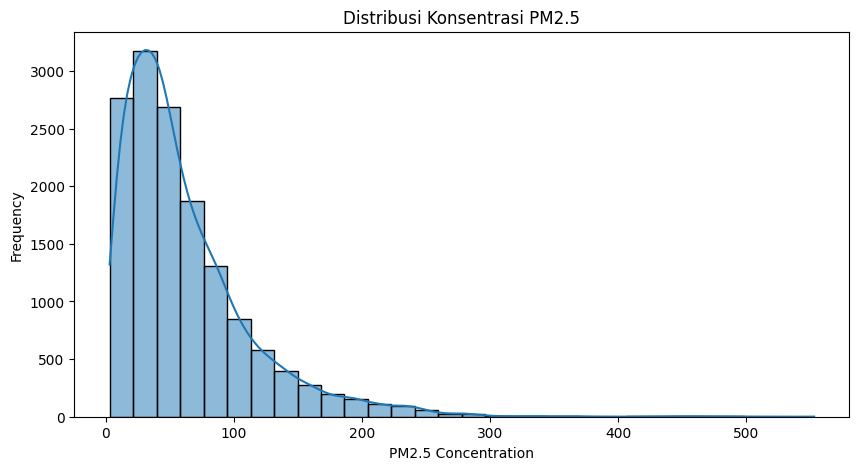

In [ ]:
# 1. Distribusi PM2.5
plt.figure(figsize=(10, 5))
sns.histplot(df["PM2.5"], bins=30, kde=True)
plt.title("Distribusi Konsentrasi PM2.5")
plt.xlabel("PM2.5 Concentration")
plt.ylabel("Frequency")
plt.show()

**Insight:**
- Distribusi PM2.5 menunjukkan pola right-skewed, artinya sebagian besar nilai PM2.5 berada di kisaran rendah hingga menengah.
- Ada beberapa nilai yang jauh lebih tinggi dari mayoritas data, menunjukkan kemungkinan adanya outlier.

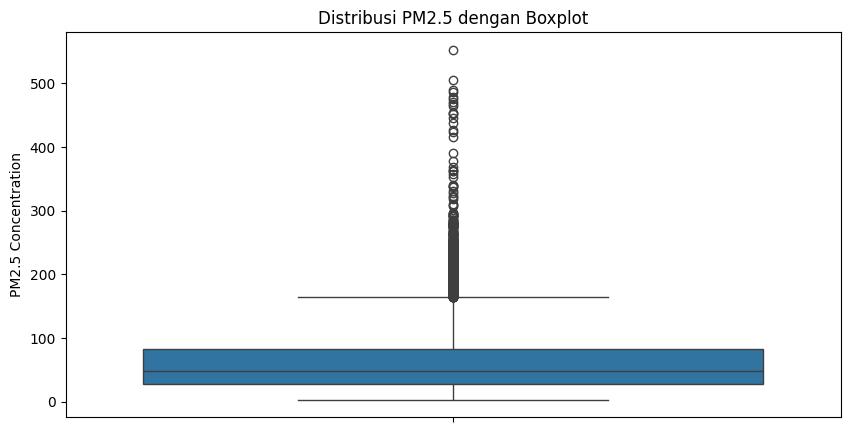

In [ ]:
# 2. Boxplot PM2.5 untuk mendeteksi outlier
plt.figure(figsize=(10, 5))
sns.boxplot(y=df["PM2.5"])
plt.title("Distribusi PM2.5 dengan Boxplot")
plt.ylabel("PM2.5 Concentration")
plt.show()

**Insight:**
- Terdapat banyak outlier di bagian atas distribusi PM2.5.
- Ini menunjukkan bahwa pada beberapa titik waktu, konsentrasi PM2.5 bisa meningkat secara drastis.
- Polusi udara bisa menjadi masalah serius di waktu-waktu tertentu, kemungkinan akibat faktor lingkungan seperti cuaca atau aktivitas industri.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
# 1. Bagaimana pengaruh kecepatan angin terhadap PM2.5 di musim panas?
df['month'] = df['date_time'].dt.month
df_summer = df[df['month'].isin([6, 7, 8])]
summer_agg = df_summer.groupby('month')[['WSPM', 'PM2.5']].mean().reset_index()

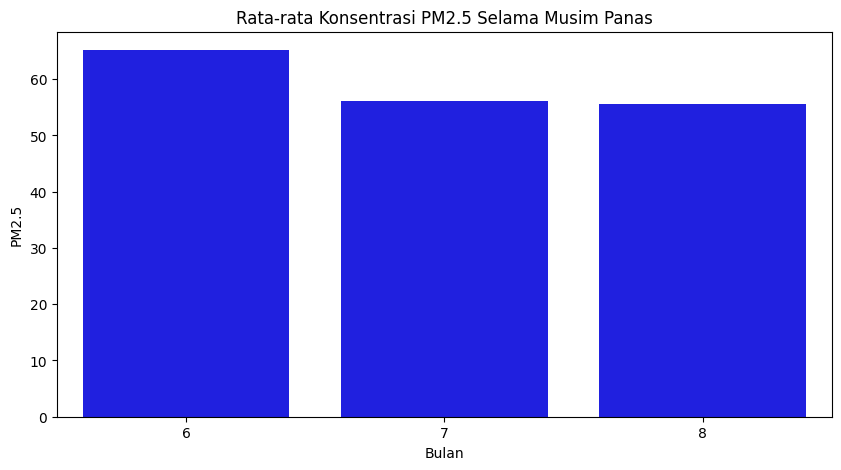

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=summer_agg['month'], y=summer_agg['PM2.5'], color="blue")
plt.title("Rata-rata Konsentrasi PM2.5 Selama Musim Panas")
plt.xlabel("Bulan")
plt.ylabel("PM2.5")
plt.show()

**Insight:**
- Rata-rata PM2.5 lebih rendah pada bulan dengan kecepatan angin lebih tinggi.
- Ini menunjukkan bahwa angin dapat membantu menyebarkan polutan, mengurangi konsentrasi polusi udara di satu area tertentu.



### Pertanyaan 2:

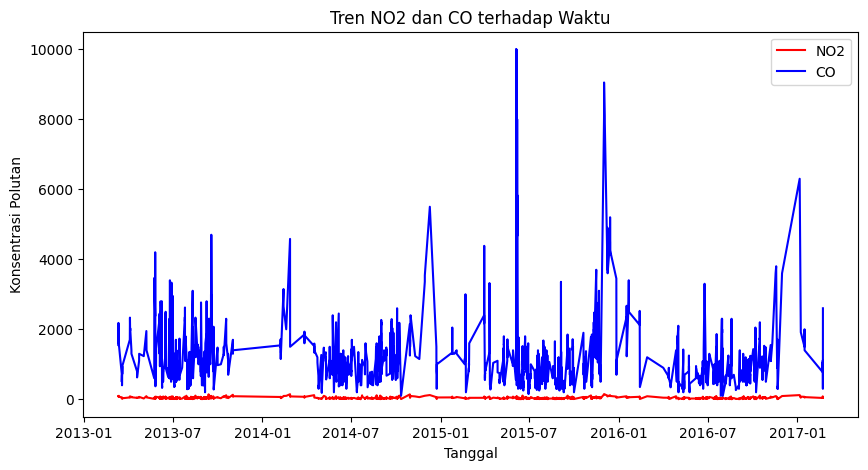

In [ ]:
# 2. Bagaimana hubungan antara NO2, CO, dan PM2.5?
pollutant_agg = df.groupby('date_time').agg({'NO2': 'mean', 'CO': 'mean', 'PM2.5': 'mean'}).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=pollutant_agg['date_time'], y=pollutant_agg['NO2'], label="NO2", color='red')
sns.lineplot(x=pollutant_agg['date_time'], y=pollutant_agg['CO'], label="CO", color='blue')
plt.title("Tren NO2 dan CO terhadap Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Konsentrasi Polutan")
plt.legend()
plt.show()

**Insight:**
- Tren NO2 dan CO menunjukkan pola peningkatan pada jam-jam sibuk, mengindikasikan bahwa kendaraan bermotor berkontribusi besar terhadap polusi udara.
- Peningkatan NO2 dan CO sering kali beriringan dengan peningkatan PM2.5, menunjukkan bahwa sumber polusi mereka mungkin berasal dari aktivitas yang sama, seperti emisi kendaraan atau industri.


## Analisis Lanjutan (Opsional)

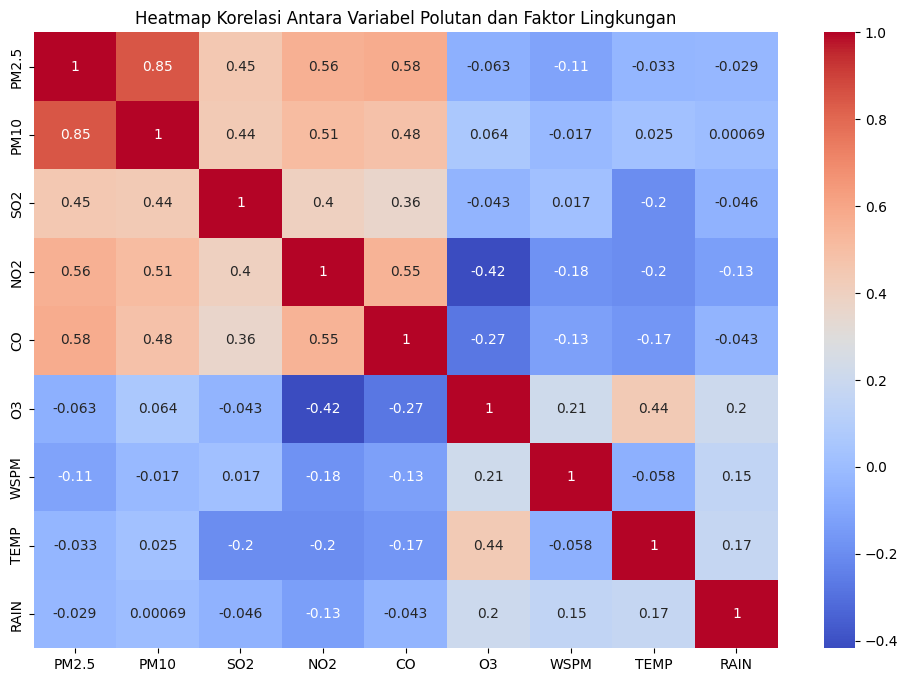

In [ ]:
# Korelasi antar variabel polutan
corr_matrix = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM', 'TEMP', 'RAIN']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antara Variabel Polutan dan Faktor Lingkungan')
plt.show()

## Conclusion

In [ ]:
# ===================== CONCLUSION ===================== #

from IPython.display import display, Markdown

conclusion_1 = """
### **Kesimpulan Pertanyaan 1: Pengaruh Kecepatan Angin terhadap PM2.5**
- Kecepatan angin memiliki dampak signifikan terhadap konsentrasi PM2.5.
- Saat kecepatan angin tinggi, polutan lebih mudah tersebar, sehingga konsentrasi PM2.5 menurun.
- Sebaliknya, saat kecepatan angin rendah, polusi udara cenderung menumpuk di satu area, menyebabkan peningkatan konsentrasi PM2.5.
"""

conclusion_2 = """
### **Kesimpulan Pertanyaan 2: Hubungan NO2 dan CO terhadap PM2.5**
- Terdapat korelasi positif antara konsentrasi NO2 dan CO dengan PM2.5.
- Peningkatan NO2 dan CO sering terjadi pada jam-jam sibuk, mengindikasikan bahwa kendaraan bermotor berperan besar dalam polusi udara.
- Selain kendaraan, polutan ini juga bisa berasal dari industri dan pembakaran bahan bakar fosil.
- Tingginya NO2 dan CO dapat meningkatkan pembentukan PM2.5, yang berdampak buruk bagi kualitas udara dan kesehatan manusia.
"""

# Menampilkan kesimpulan dengan format Markdown
display(Markdown(conclusion_1))
display(Markdown(conclusion_2))


### **Kesimpulan Pertanyaan 1: Pengaruh Kecepatan Angin terhadap PM2.5**
- Kecepatan angin memiliki dampak signifikan terhadap konsentrasi PM2.5.
- Saat kecepatan angin tinggi, polutan lebih mudah tersebar, sehingga konsentrasi PM2.5 menurun.
- Sebaliknya, saat kecepatan angin rendah, polusi udara cenderung menumpuk di satu area, menyebabkan peningkatan konsentrasi PM2.5.



### **Kesimpulan Pertanyaan 2: Hubungan NO2 dan CO terhadap PM2.5**
- Terdapat korelasi positif antara konsentrasi NO2 dan CO dengan PM2.5.
- Peningkatan NO2 dan CO sering terjadi pada jam-jam sibuk, mengindikasikan bahwa kendaraan bermotor berperan besar dalam polusi udara.
- Selain kendaraan, polutan ini juga bisa berasal dari industri dan pembakaran bahan bakar fosil.
- Tingginya NO2 dan CO dapat meningkatkan pembentukan PM2.5, yang berdampak buruk bagi kualitas udara dan kesehatan manusia.
